In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Online Course to Suppliment Independent Research

## OpenCV Section 1

### Opening image files

In [4]:
#using cv.imread function to get an image to a numpy array
#OpenCV doesnt give an error when a wrong path is given, check type for NoneType.
hunter_img = cv.imread("../Notables/hunter.jpg")
type(hunter_img)

numpy.ndarray

In [6]:
hunter_img.shape

(1200, 630, 3)

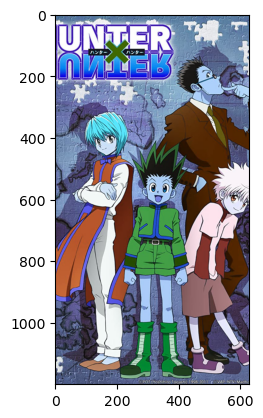

In [8]:

#the result will be a discolored image because openCV and plt have different expectations for RGB channels
#plt -- R G B
#cv -- B G R, red and blue channels are swapped
plt.imshow(hunter_img)

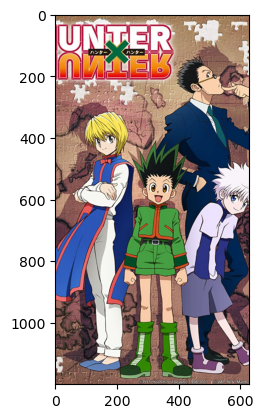

In [10]:
#using cv functionality to change the color channels.
#parameters, pass in source, color code
fix_img = cv.cvtColor(hunter_img, cv.COLOR_BGR2RGB) #change color channels from BGR to RGB
plt.imshow(fix_img)


In [12]:
#read an image as a grayscale image, the shape will no longer have color channels 
img_gray = cv.imread("../Notables/hunter.jpg", cv.IMREAD_GRAYSCALE) 
img_gray.shape

(1200, 630)

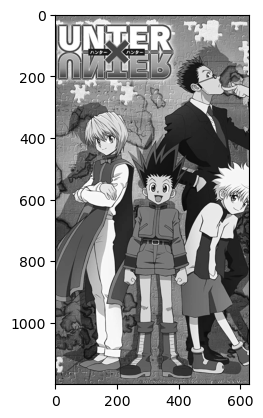

In [14]:
#the default color mapping is veridis,
plt.imshow(img_gray, cmap='gray')

### Resizing and Simple Image Manipulation

(1200, 630, 3)

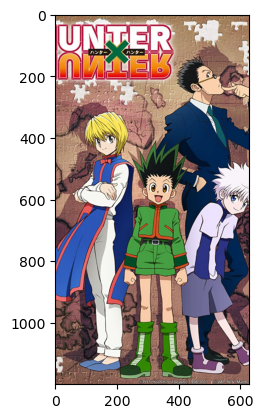

In [17]:
#resizing an image.
plt.imshow(fix_img)
fix_img.shape

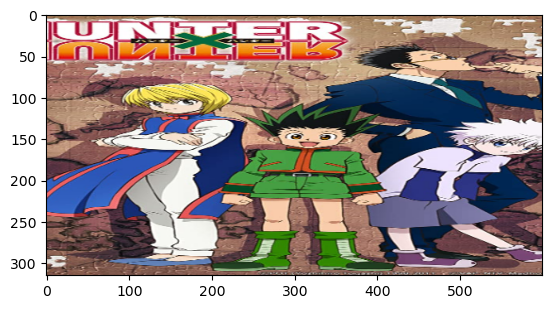

In [19]:
#resize function parameters, source, destination size, lets squash the image
new_img = cv.resize(fix_img, (600, 315))
plt.imshow(new_img)


In [58]:
#resize by a dimension ratio

w_ratio = .5
h_ratio = .5

new_img = cv.resize(fix_img, (0,0), fix_img, w_ratio, h_ratio)

(600, 315, 3)

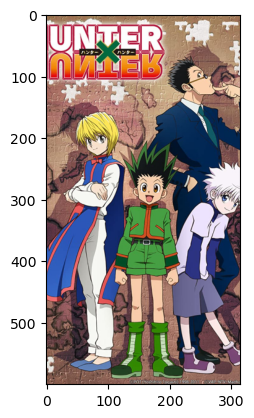

In [60]:
plt.imshow(new_img)
new_img.shape

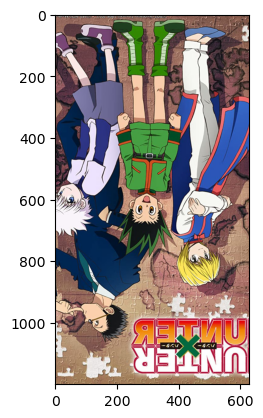

In [25]:
#Flip the image along the vertical/horizontal axis. 0 horozontal, 1 vertical, -1 both
new_img = cv.flip(fix_img, -1)
plt.imshow(new_img)


In [27]:
#Saving an image file 
type(fix_img)
cv.imwrite("new_Hunter.jpg", fix_img)

True

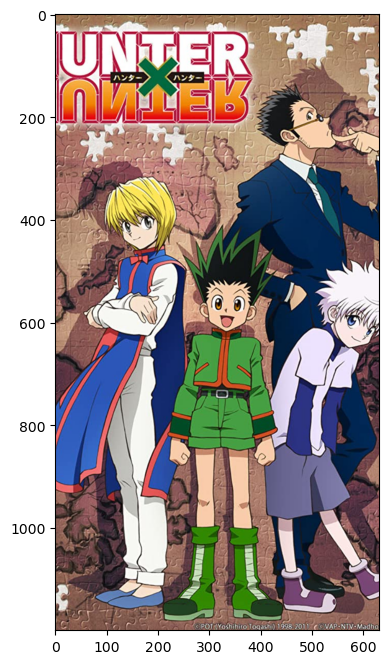

In [29]:
#Adusting the canvas space using matplotlib, larger canvas space than the default
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111) #1by1 subplot
ax.imshow(fix_img)


### OpenCV with Scripts

- Check the python scripts located in this folder, These will have the code that opens an image and waits for the escape key to close them
- We need to run the in a script because it would cause an error with a kernal otherwise
- Run the scripts through anaconda prompt in the Notables folder
  

### Drawing on Images


In [3]:
#create a blank image with 512h, 512w, and 3 color channels
blank_img = np.zeros(shape = (512, 512, 3), dtype = np.int16)


In [5]:
blank_img.shape

(512, 512, 3)

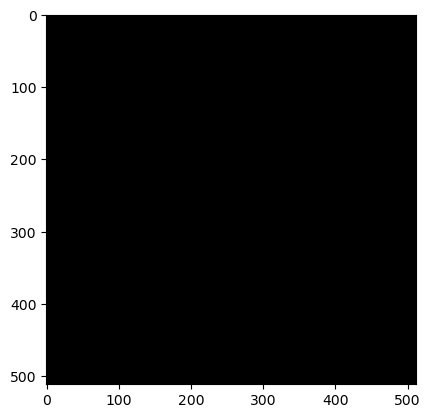

In [7]:
#the image is made up of zeros thus it will be a black square
plt.imshow(blank_img)

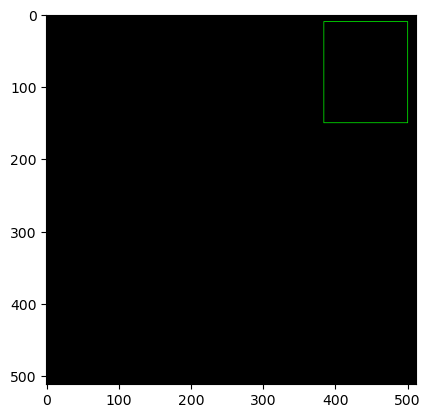

In [9]:
#lets draw a rectangle on the image using cv functions. parameters, image, point1, point2 (coordinates)
#this function acts directly on the image doesnt return anything
#pt1 is the top left corner of the rectangle, pt2 is the bottom right
cv.rectangle(blank_img, pt1 = (384, 10), pt2 = (500, 150), color = (0, 255, 0), thickness=1)
plt.imshow(blank_img)

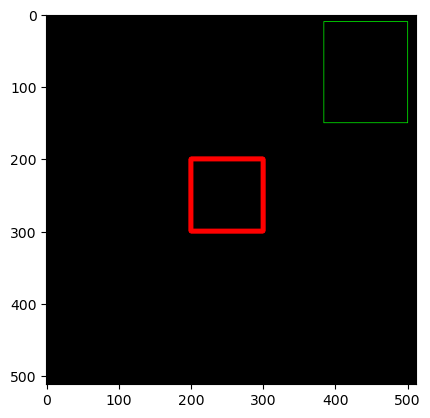

In [12]:
#lets draw a square in the middle

cv.rectangle(blank_img, pt1=(200,200), pt2=(300,300), color = (255, 0, 0), thickness = 5)
plt.imshow(blank_img)

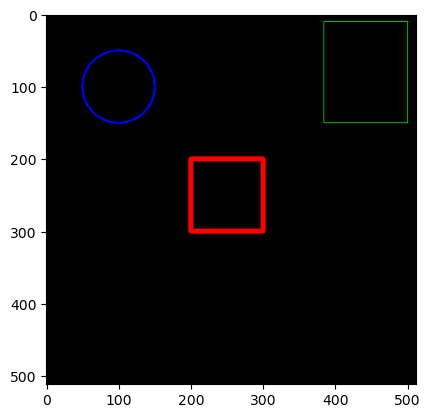

In [15]:
#demonstrating circles, center is x,y of where the center is.
cv.circle(blank_img, center=(100,100), radius = 50, color = (0,0,255), thickness = 2)
plt.imshow(blank_img)

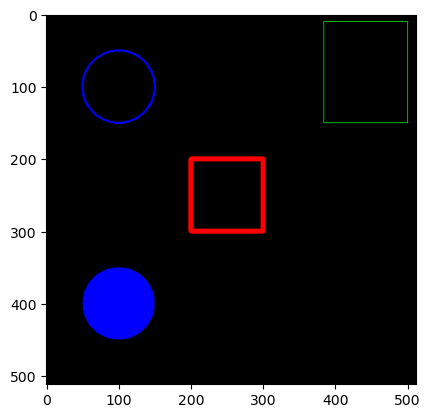

In [18]:
#if we want a filled in circle we use a thickness of -1
#demonstrating circles, center is x,y of where the center is.
cv.circle(blank_img, center=(100,400), radius = 50, color = (0,0,255), thickness = -1)
plt.imshow(blank_img)


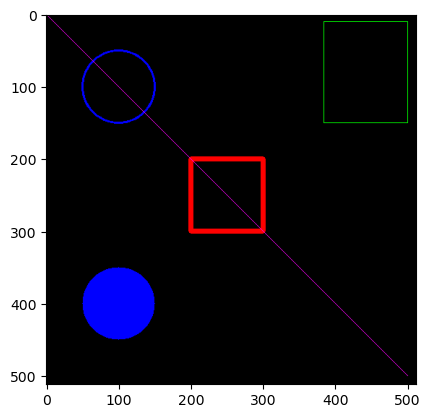

In [20]:
#drawing a line
cv.line(blank_img, pt1 = (0,0) , pt2=(500,500) , color = (255,0, 255), thickness = 1)
plt.imshow(blank_img)

### Text on Images

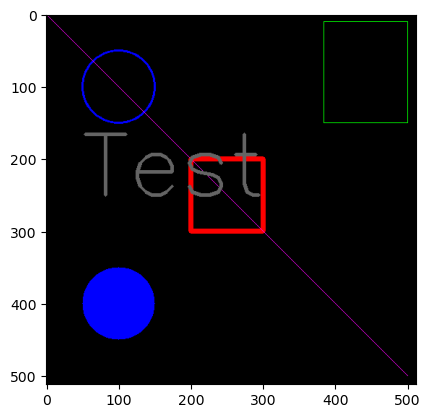

In [24]:
#lets create a variable to hold our desired font
font = cv.FONT_HERSHEY_SIMPLEX
#org is the bottom left corner of the text. where it starts.
cv.putText(blank_img, text = "Test", org = (50, 250), fontFace = font, fontScale = 4, color = (100, 100, 100), thickness=4, lineType= cv.LINE_AA)
plt.imshow(blank_img)

In [26]:
#how to create custom polygons that wrap around a desired object
#lets create a new blank img, black thus zeros

blank_img = np.zeros(shape = (512, 512, 3), dtype = np.int32)
#decide vertices for polygon, each array contains x, y coord
#specify that the dtype is integer so they are not passed in as floats
vertices = np.array([[100, 300], [200, 200], [400, 300], [200, 400]],dtype = np.int32)
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

In [28]:
#we need to reshape it into 3 dimensions for the color channels
#this adds another dimension to the array so it will have 3 channels

pts = vertices.reshape((-1,1,2))

In [30]:
pts.shape
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

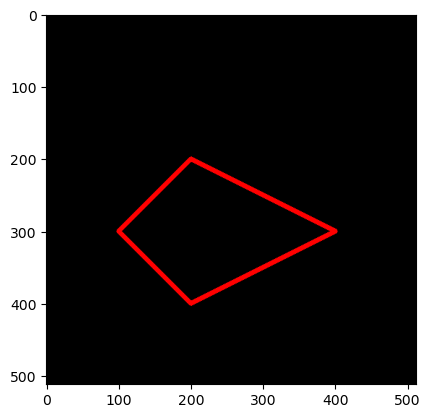

In [32]:
#pass in a list of the pts array, cv format
#is closed is a flag that indicated whether the drawn polylines are closed or not
cv.polylines(blank_img, [pts], isClosed = True, color = (255, 0, 0), thickness = 5)
plt.imshow(blank_img)

### Mouse Drawing


In [10]:
#we want to run everything as a single cell or single script

##function##
def draw_circle(event, x, y, flags, param):
    #x, y are the mouse position, open cv takes these
    #event is what the mouse did
    #flags and params are extra parameters in case flags or params are sent

    #when the left button is pressed down
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(img, (x, y), 100, (0,255,0), -1)

    #lets check for another even
    elif event == cv.EVENT_RBUTTONDOWN:
        cv.circl(img, (x,y), 100, (255, 0,0), -1)



#have a named window and connect name then sent to callback
cv.namedWindow(winname = 'test')
#connect image to callback for mouse, pass in name and function.
cv.setMouseCallback('test', draw_circle)




###Showing img with openCV
img = np.zeros(shape = (512,512,3), dtype = np.int8)

while True:
    cv.imshow('test', img)
    #IF we wait atleast 1ms AND we have pressed the Esc key(27), break the loop
    if cv.waitKey(1) & 0xFF == 27:
        break
cv.destroyAllWindows()





### Click and Drag project


In [38]:
#first create a black image to draw on
black_img = np.zeros(shape=(556, 556, 3))
#variables for drawing, True while the mouse button is down, False as up
drawing = False
#ix, iy keeps track of where your mouse originally was, 
ix, iy =  -1,-1

def drag_draw(event, x, y, flags, params):
    global ix, iy, drawing #allows us to change them in the global namespace
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y #set original point when we click down

    #check if we are moving the mouse
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing  == True:
            cv.rectangle(black_img, (ix,iy), (x,y), (0,0,255), thickness = -1)

    #check when we stop holding the mouse, These rectangles are continuosly drawn, doesnt appear to be.
    elif event == cv.EVENT_LBUTTONUP:
        drawing == False
        cv.rectangle(black_img, (ix,iy), (x,y), (0,0,255), thickness = -1)


#connect img to the mouse
cv.namedWindow(winname = 'drawing')
cv.setMouseCallback("drawing", drag_draw)

while True:
    cv.imshow("drawing", black_img)
    if cv.waitKey(1) & 0xFF == 27:
        break

cv.destroyAllWindows()

